# Ford GoBike System Data
## by Muhammad Adel

## Dataset Overview


> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco.
- Note: the data associate with user gender and birth year used 453159 record from 519700 record other used the full dataset records

In [11]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [12]:
bike_sys = pd.read_csv('2017-fordgobike-tripdata.csv')

### Questions we try to answer 
- 1- What's the precentage of each gender type?
- 2- What's the precentage of user type -cutomers and subscribers-? 
- 3- What's the precentage of each gender type by each user type?
- 4- What's the average duration was spent by each gender type?
- 5- What's the average duration was spent by each user type?
- 6- What's the average dutation was spend by each gender by user type?

## 1- What's the precentage of each gender type?

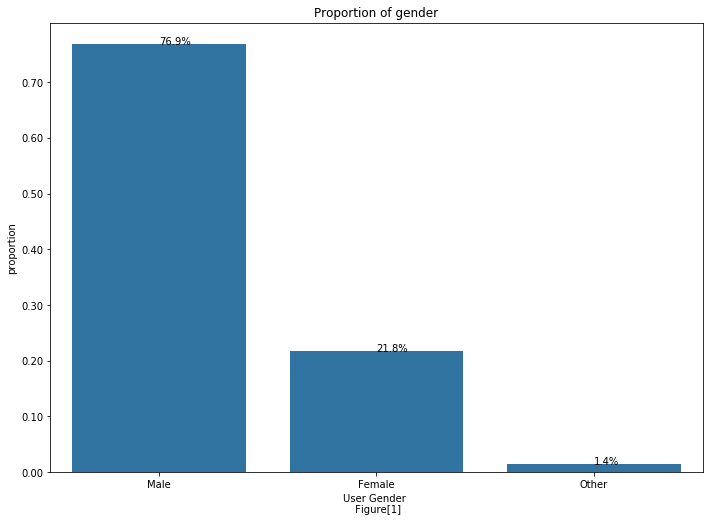

In [13]:
total_no = sum(~bike_sys.member_gender.isna()) # here we get the total number of users how fill gender
max_value = bike_sys.member_gender.value_counts()[0]
max_prop = max_value / total_no
yticks = np.arange(0, max_prop, 0.1)
ylabels = ['{:0.2f}'.format(v) for v in yticks]
plt.figure(figsize=[ 11.69, 8.27])
plt.yticks(yticks * total_no, ylabels)
base_color = sb.color_palette()[0]
sb.countplot(data=bike_sys, x='member_gender', color=base_color)
plt.ylabel('proportion');
for i in range(len(bike_sys.member_gender.value_counts())):
    y = bike_sys.member_gender.value_counts()[i]
    pct_string = '{:0.1f}%'.format(100 * y / total_no)
    plt.text(i, y, pct_string)
plt.title('Proportion of gender');
plt.xlabel('User Gender \n Figure[1]');

### we saw from Figure[1] that:
- 76.9 % of our users which fill gender are male
- 21.8 % of our users which fill gender are Female
- 1.4 % of our users which fill gender are other

## 2- What's the precentage of user type -cutomers and subscribers-?

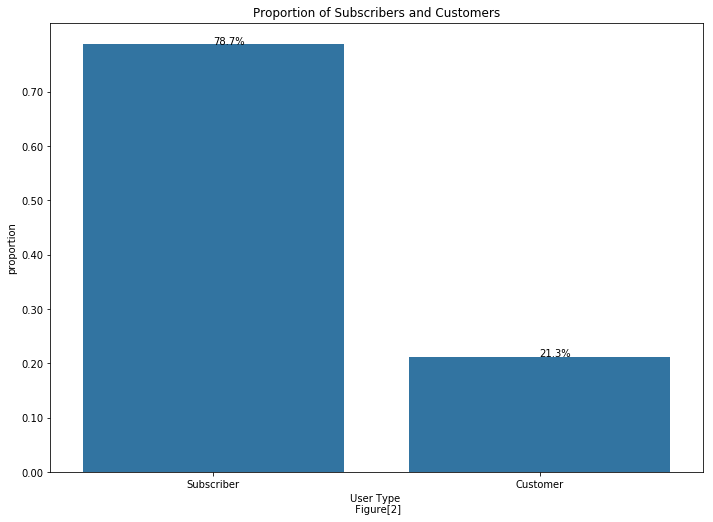

In [14]:
total_no = sum(~bike_sys.user_type.isna()) # here we get the total number of users how fill gender
max_value = bike_sys.user_type.value_counts()[0]
max_prop = max_value / total_no
yticks = np.arange(0, max_prop, 0.1)
ylabels = ['{:0.2f}'.format(v) for v in yticks]
plt.figure(figsize=[ 11.69, 8.27])
plt.yticks(yticks * total_no, ylabels)
base_color = sb.color_palette()[0]
sb.countplot(data=bike_sys, x='user_type', color=base_color, order=bike_sys.user_type.value_counts().index)
plt.ylabel('proportion');
for i in range(len(bike_sys.user_type.value_counts())):
    y = bike_sys.user_type.value_counts()[i]
    pct_string = '{:0.1f}%'.format(100 * y / total_no)
    plt.text(i, y, pct_string)

plt.title('Proportion of Subscribers and Customers');
plt.xlabel('User Type \n Figure[2]');

### we saw from Figure[2] that:
- 78.7 % of our users are Subscribers
- 21.3 % of our users are customers 

## 3- What's the precentage of each gender type by each user type?

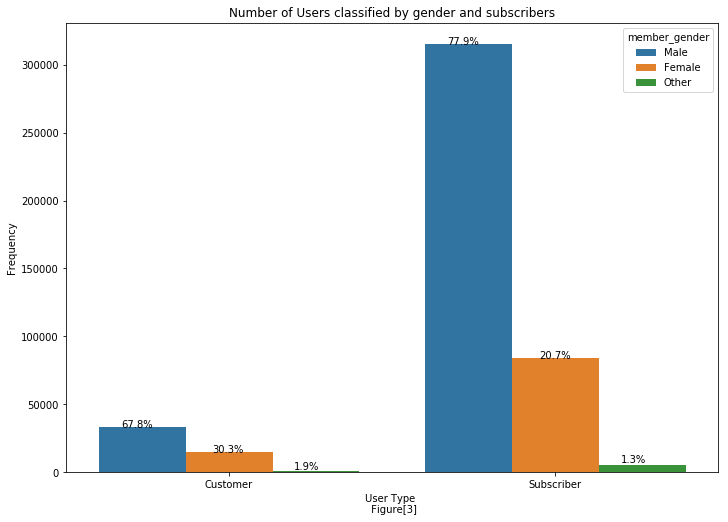

In [20]:
plt.figure(figsize=[ 11.69, 8.27])
sb.countplot(data = bike_sys, x = 'user_type', hue = 'member_gender');
plt.title('Number of Users classified by gender and subscribers');
plt.ylabel('Frequency');
plt.xlabel('User Type \n Figure[3]');
prcentage_of_male_in_customer = len(bike_sys.query('user_type=="Customer" and member_gender=="Male"')) / len(bike_sys.query('user_type=="Customer" and (member_gender=="Male" or member_gender=="Female" or member_gender=="Other")'))
prcentage_of_Female_in_customer = len(bike_sys.query('user_type=="Customer" and member_gender=="Female"')) / len(bike_sys.query('user_type=="Customer" and (member_gender=="Male" or member_gender=="Female" or member_gender=="Other")'))
prcentage_of_Other_in_customer = len(bike_sys.query('user_type=="Customer" and member_gender=="Other"')) / len(bike_sys.query('user_type=="Customer" and (member_gender=="Male" or member_gender=="Female" or member_gender=="Other")'))
# here we check if our calculation is correct or not
#print(prcentage_of_male_in_customer)
#print(prcentage_of_Female_in_customer)
#print(prcentage_of_Other_in_customer)
#print(prcentage_of_male_in_customer + prcentage_of_Female_in_customer + prcentage_of_Other_in_customer)

prcentage_of_male_in_subscriber = len(bike_sys.query('user_type=="Subscriber" and member_gender=="Male"')) / len(bike_sys.query('user_type=="Subscriber" and (member_gender=="Male" or member_gender=="Female" or member_gender=="Other")'))
prcentage_of_Female_in_subscriber = len(bike_sys.query('user_type=="Subscriber" and member_gender=="Female"')) / len(bike_sys.query('user_type=="Subscriber" and (member_gender=="Male" or member_gender=="Female" or member_gender=="Other")'))
prcentage_of_Other_in_subscriber = len(bike_sys.query('user_type=="Subscriber" and member_gender=="Other"')) / len(bike_sys.query('user_type=="Subscriber" and (member_gender=="Male" or member_gender=="Female" or member_gender=="Other")'))
# here we check if our calculation is correct or not
#print(prcentage_of_male_in_subscriber)
#print(prcentage_of_Female_in_subscriber)
#print(prcentage_of_Other_in_subscriber)
#print(prcentage_of_male_in_subscriber + prcentage_of_Female_in_subscriber + prcentage_of_Other_in_subscriber)

plt.text(0 - 0.33, len(bike_sys.query('user_type=="Customer" and member_gender=="Male"')), '{:0.1f}%'.format(prcentage_of_male_in_customer * 100))
plt.text(0 - 0.05, len(bike_sys.query('user_type=="Customer" and member_gender=="Female"')), '{:0.1f}%'.format(prcentage_of_Female_in_customer * 100)) 
plt.text(0 + 0.2, len(bike_sys.query('user_type=="Cutomer" and member_gender=="Other"')) + 1900, '{:0.1f}%'.format(prcentage_of_Other_in_customer * 100)) 

plt.text(1 - 0.33, len(bike_sys.query('user_type=="Subscriber" and member_gender=="Male"')), '{:0.1f}%'.format(prcentage_of_male_in_subscriber * 100))
plt.text(1 - 0.05, len(bike_sys.query('user_type=="Subscriber" and member_gender=="Female"')), '{:0.1f}%'.format(prcentage_of_Female_in_subscriber * 100)) 
plt.text(1 + 0.2, len(bike_sys.query('user_type=="Subscriber" and member_gender=="Other"')) + 1900, '{:0.1f}%'.format(prcentage_of_Other_in_subscriber * 100));

### we saw from Figure[3] that:

- 67.8% form our Customers are Males, 30.3% are Female, and 1.9% are others
- 77.9% form our Subscribers genders are Males, 20.7% are Female, and 1.3% are others

## 4- What's the average duration was spent by each gender type?

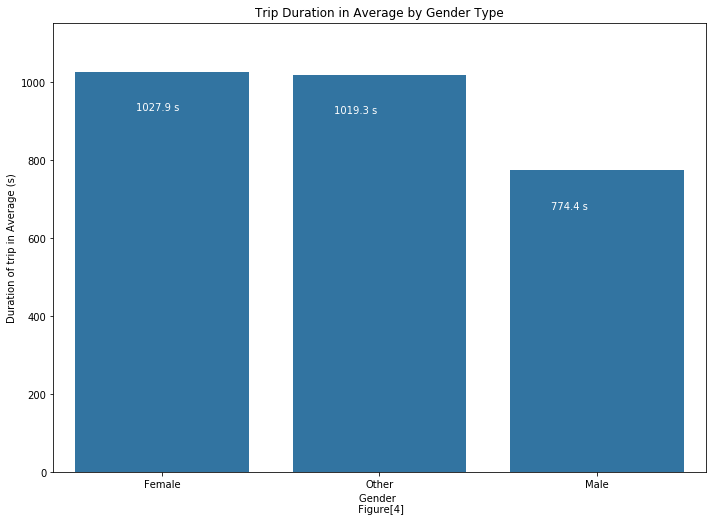

In [19]:
plt.figure(figsize=[ 11.69, 8.27])
sb.barplot(data = bike_sys, x='member_gender', y='duration_sec', errwidth=0, color=sb.color_palette()[0], order=['Female', 'Other', 'Male']);
plt.xlabel('Gender \n Figure[4]')
plt.ylabel('Duration of trip in Average (s)');
plt.title('Trip Duration in Average by Gender Type');
# here we calculate the mean of duration for each gender
female_only = bike_sys.query('member_gender == "Female"')
male_only = bike_sys.query('member_gender == "Male"')
other_only = bike_sys.query('member_gender == "Other"')
mean_duration_of_female = female_only['duration_sec'].mean()
mean_duration_of_male = male_only['duration_sec'].mean()
mean_duration_of_other = other_only['duration_sec'].mean()
# check if our calcultions are correct or not
#print(mean_duration_of_female)
#print(mean_duration_of_male)
#print(mean_duration_of_other)
# below we wil write our precentage in bars
plt.text(0 - 0.12, mean_duration_of_female - 100,'{:0.1f} s'.format(mean_duration_of_female), color='white')
plt.text(1 - 0.21, mean_duration_of_other - 100,'{:0.1f} s'.format(mean_duration_of_other), color='white')
plt.text(2 - 0.21, mean_duration_of_male - 100,'{:0.1f} s'.format(mean_duration_of_male), color='white');

### we saw from Figure[4] that:

- average duration of females about 1027.9 seconds
- average duration of other about 1019.3 seconds
- average duration of females about 774.4 seconds
- in average Females are the highest in trip durations in average  
- altough males are 76.9% but females spend more in average and males set in the last place

## 5- What's the average duration was spent by each user type?

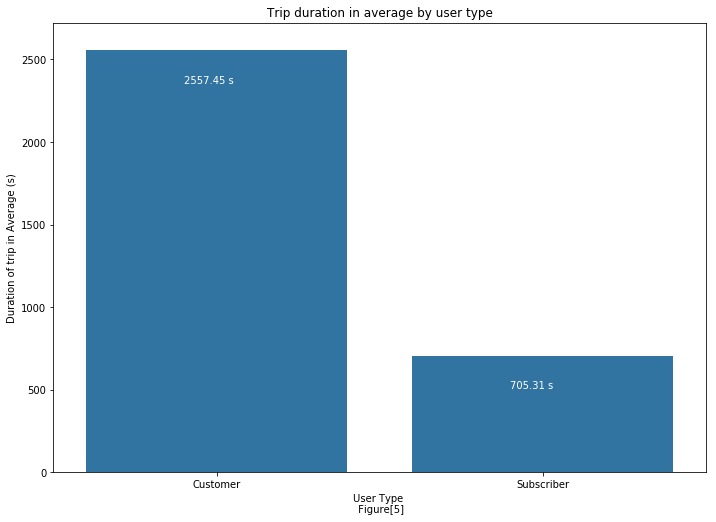

In [21]:
plt.figure(figsize=[ 11.69, 8.27])
sb.barplot(data = bike_sys, x='user_type', y='duration_sec', errwidth=0, color=sb.color_palette()[0]);
plt.title('Trip duration in average by user type');
plt.xlabel('User Type \n Figure[5]')
plt.ylabel('Duration of trip in Average (s)');
mean_of_duration_of_customers = bike_sys.query('user_type=="Customer"')['duration_sec'].mean()# here we calculate mean duration in seconds of customers
mean_of_duration_of_Subscribers = bike_sys.query('user_type=="Subscriber"')['duration_sec'].mean() # here we calculate mean duration in seconds of subscribers
# we will check our means
#print(mean_of_duration_of_customers)
#print(mean_of_duration_of_Subscribers)
# then we will write values in bars
plt.text(0 - 0.1, mean_of_duration_of_customers - 200, '{:0.2f} s'.format(mean_of_duration_of_customers), color='white');
plt.text(1 - 0.1, mean_of_duration_of_Subscribers - 200, '{:0.2f} s'.format(mean_of_duration_of_Subscribers), color='white');

### we saw from Figure[5] that:
- average duration was spent by cutomers about 2557.45 seconds
- average duration was spent by subscribers about 705.31 seconds
- altought 78.7% of our users are subscribers customers spend more time than our subscribers in average. 

## 6- What's the average dutation was spend by each gender by user type?

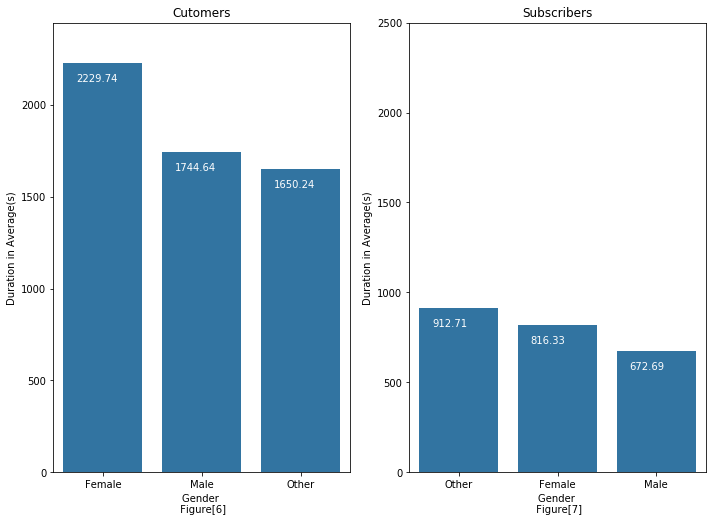

In [22]:
cutomers_only = bike_sys.query('user_type=="Customer"')
female_by_customer = bike_sys.query('user_type=="Customer" and member_gender=="Female"')
male_by_customer = bike_sys.query('user_type=="Customer" and member_gender=="Male"')
other_by_customer = bike_sys.query('user_type=="Customer" and member_gender=="Other"')
mean_female_by_customer = female_by_customer['duration_sec'].mean()
mean_male_by_customer = male_by_customer['duration_sec'].mean()
mean_other_by_customer = other_by_customer['duration_sec'].mean()

subscribers_only = bike_sys.query('user_type=="Subscriber"')
female_by_subscriber = bike_sys.query('user_type=="Subscriber" and member_gender=="Female"')
male_by_subsriber = bike_sys.query('user_type=="Subscriber" and member_gender=="Male"')
other_by_subscriber = bike_sys.query('user_type=="Subscriber" and member_gender=="Other"')
mean_female_by_subscriber = female_by_subscriber['duration_sec'].mean()
mean_male_by_subscriber = male_by_subsriber['duration_sec'].mean()
mean_other_by_subscriber = other_by_subscriber['duration_sec'].mean()


plt.figure(figsize=[ 11.69, 8.27])
plt.subplot(1,2,1)
yticks = np.arange(0, 2500 + 500, 500)
plt.yticks(yticks)
sb.barplot(data=cutomers_only, x='member_gender', y='duration_sec', errwidth=0, color=sb.color_palette()[0], order=['Female', 'Male', 'Other'])
plt.xlabel('Gender \n Figure[6]')
plt.ylabel('Duration in Average(s)')
plt.title('Cutomers');
plt.text(0 - 0.27,mean_female_by_customer - 100, '{:0.2f}'.format(mean_female_by_customer),color="white")
plt.text(1 - 0.27,mean_male_by_customer - 100, '{:0.2f}'.format(mean_male_by_customer), color="white")
plt.text(2 - 0.27,mean_other_by_customer - 100, '{:0.2f}'.format(mean_other_by_customer), color="white")
plt.subplot(1,2,2)
sb.barplot(data=subscribers_only, x='member_gender', y='duration_sec', errwidth=0, color=sb.color_palette()[0], order=['Other', 'Female', 'Male'])
plt.xlabel('Gender \n Figure[7]')
plt.ylabel('Duration in Average(s)')
plt.title('Subscribers');
yticks = np.arange(0, 2500 + 500, 500)
plt.yticks(yticks, yticks)
plt.text(0 - 0.27,mean_other_by_subscriber - 100, '{:0.2f}'.format(mean_other_by_subscriber), color="white")
plt.text(1 - 0.27,mean_female_by_subscriber - 100, '{:0.2f}'.format(mean_female_by_subscriber), color="white")
plt.text(2 - 0.27,mean_male_by_subscriber - 100, '{:0.2f}'.format(mean_male_by_subscriber), color="white");

### we saw from Figure[6] and Figure[7] that:
- in cutomer type females spend in average about 2229.74 seconds, males about 1744.64 seconds and other about 1650.24 seconds
- in subscriber type other spend in average about 912.71 seconds, females about 816.33 seconds and males about 672.69 seconds